In [34]:
pwd

'/mnt/d/Future_Plan/GaBP2/Revision/Comment/Referee2/GitHub/2_SMOTE'

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew,kurtosis
import warnings
warnings.filterwarnings('ignore')

Refreence taken from https://www.mdpi.com/2079-6412/13/9/1657

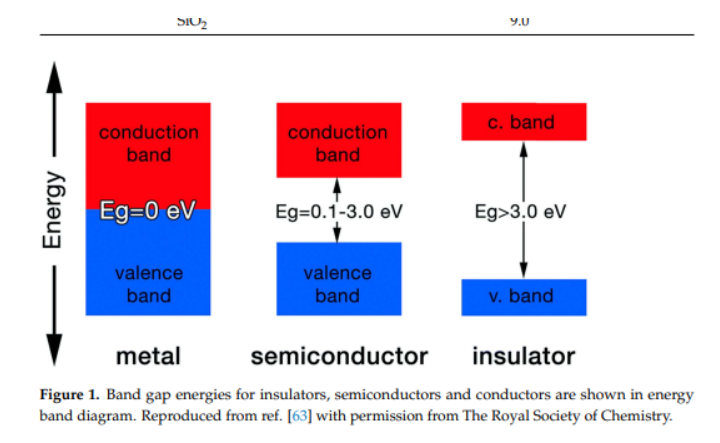

In [3]:
Descriptor = pd.read_csv("Descriptor_GaBP2__20_Sep_24.csv")
Descriptor.head()

,compound,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max
0,ZnGeN2,2.44,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
1,ZnGeN2,3.02,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
2,ZnGeN2,2.73,181.56,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
3,AlGaN2,4.59,178.46,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91
4,AlGaN2,4.63,178.36,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91


In [4]:
ML_data = Descriptor.copy()
ML_data.head(2)

,compound,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max
0,ZnGeN2,2.44,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
1,ZnGeN2,3.02,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13


In [5]:
ML_data.shape

(92, 15)

In [6]:
ML_data1 = ML_data.drop(['compound'], axis=1)
ML_data1.sample(5)

,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max
29,2.16,365.24,186.67,180,193,123.67,107,142,128.33,100,155,5.01,1.82,7.31
24,1.94,316.85,176.67,139,211,116.33,107,122,120.00,100,135,4.76,1.82,7.13
73,2.35,300.56,176.33,139,210,113.33,107,122,115.00,100,135,3.76,1.82,7.13
70,1.29,400.10,185.00,158,217,130.00,107,144,133.33,100,155,5.93,1.82,8.65
61,0.45,245.51,176.67,155,217,118.00,71,144,121.67,65,155,5.59,0.81,8.65


In [7]:
corrmat = abs(ML_data1.corr())
#print(corrmat["Spin-polarization"].sort_values(ascending=False).to_string())
print(corrmat['BandGap'].nlargest(20))


BandGap         1.000000
density_Avg     0.884194
atom_rad_Avg    0.741464
cov_rad_Avg     0.710092
density_Min     0.683200
Volume          0.651097
atom_rad_Min    0.576868
vand_rad_Max    0.552002
cov_rad_Min     0.536342
vand_rad_Avg    0.464032
density_Max     0.437305
cov_rad_Max     0.409128
atom_rad_Max    0.351493
vand_rad_Min    0.162573
Name: BandGap, dtype: float64


## Remove metalic data from datset

In [8]:
ML_data1['BandGap'].describe()

count    92.000000
mean      1.443587
std       1.167325
min       0.020000
25%       0.337500
50%       1.365000
75%       2.170000
max       4.630000
Name: BandGap, dtype: float64

In [9]:
92-79

13

In [10]:
ML_data1 = ML_data1[ML_data1['BandGap'].between(0.1, 5)]
ML_data1.head(2)

,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max
0,2.44,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
1,3.02,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13


In [11]:
ML_data1['BandGap'].describe()

count    79.000000
mean      1.671772
std       1.102938
min       0.100000
25%       0.785000
50%       1.670000
75%       2.395000
max       4.630000
Name: BandGap, dtype: float64

## Divide target in two classes

In [12]:
ML_data1['BandGap_class']= ML_data1['BandGap'].apply(lambda z: 0 if z <= 3 else 1)
ML_data1['BandGap_class'].head()

0    0
1    1
2    0
3    1
4    1
Name: BandGap_class, dtype: int64

In [13]:
print(np.unique(ML_data1['BandGap_class']))

[0 1]


In [14]:
pd.value_counts(ML_data1['BandGap_class'])

0    72
1     7
Name: BandGap_class, dtype: int64

# Balance Imbalanced Data

In [ ]:
#ML_data1.to_csv("ML_data1N.csv", index=False)

In [15]:
ML_data2= pd.read_csv("ML_data1N.csv")
ML_data2.head(2)

,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max,BandGap_class
0,2.44,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13,0
1,3.02,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13,1


In [16]:
ML_data2.keys()

Index(['BandGap', 'Volume', 'vand_rad_Avg', 'vand_rad_Min', 'vand_rad_Max',
       'cov_rad_Avg', 'cov_rad_Min', 'cov_rad_Max', 'atom_rad_Avg',
       'atom_rad_Min', 'atom_rad_Max', 'density_Avg', 'density_Min',
       'density_Max', 'BandGap_class'],
      dtype='object')

In [17]:
ML_data_filt= ML_data2[['BandGap','BandGap_class']]
ML_data_filt.sample(5)

,BandGap,BandGap_class
3,4.59,1
49,0.78,0
78,0.19,0
2,2.73,0
36,1.67,0


In [18]:
#X1 = ML_data2.drop(['dir_gap','magmom','hform'], axis=1)
X1 = ML_data2.drop(['BandGap'], axis=1)
X1.head(2)

,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max,BandGap_class
0,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13,0
1,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13,1


In [19]:
X1.shape

(79, 14)

In [20]:
Y1=  ML_data2['BandGap_class']
Y1.sample(5)

17    0
55    0
74    0
48    0
5     1
Name: BandGap_class, dtype: int64

In [21]:
pd.value_counts(ML_data2['BandGap_class'])

0    72
1     7
Name: BandGap_class, dtype: int64

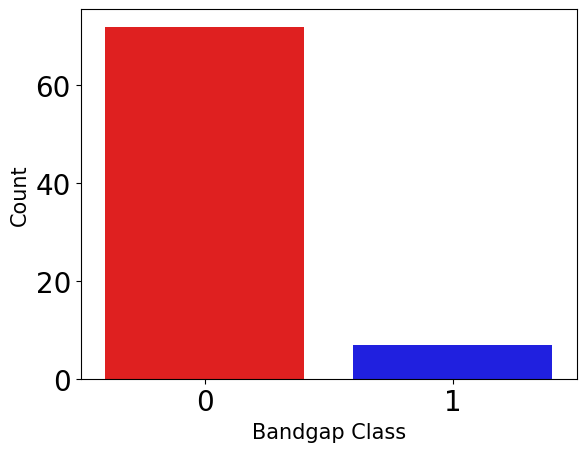

In [22]:
#plt.figure(figsize=(6,4),dpi=300)
palette = ['red', 'blue']
b2= sns.countplot(x ='BandGap_class',data = ML_data2, palette=palette)
b2.set_xlabel("Bandgap Class",fontsize=15)
b2.set_ylabel("Count",fontsize=15)
b2.tick_params(labelsize=20)
b2.figure.savefig("BandgapCount.pdf",bbox_inches='tight')
plt.show()
# from google.colab import files
# files.download("BandgapCount.pdf")

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=2)
X_sm, y_sm = smote.fit_resample(X1, Y1)

In [24]:
pd.value_counts(y_sm)

0    72
1    72
Name: BandGap_class, dtype: int64

## Concat X_sm and  y_sm dataset

In [25]:
smote_data = pd.concat([X_sm], axis=1)
smote_data.sample(5)

,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max,BandGap_class
42,379.430000,184.330000,158,210,124.670000,111,144,126.670000,110,155,5.570000,2.33,8.650000,0
103,179.704060,172.745899,149,195,104.544487,71,122,107.282801,65,131,3.612521,0.81,6.360372,1
130,181.697163,168.610079,139,210,104.343604,71,122,108.263581,65,134,4.368786,0.81,7.081186,1
137,186.967407,172.665365,150,210,107.465914,71,137,109.536677,65,149,4.065945,0.81,8.228292,1
25,208.750000,174.670000,155,211,111.670000,71,144,115.000000,65,155,4.930000,0.81,8.650000,0


In [26]:
pd.value_counts(smote_data['BandGap_class'])

0    72
1    72
Name: BandGap_class, dtype: int64

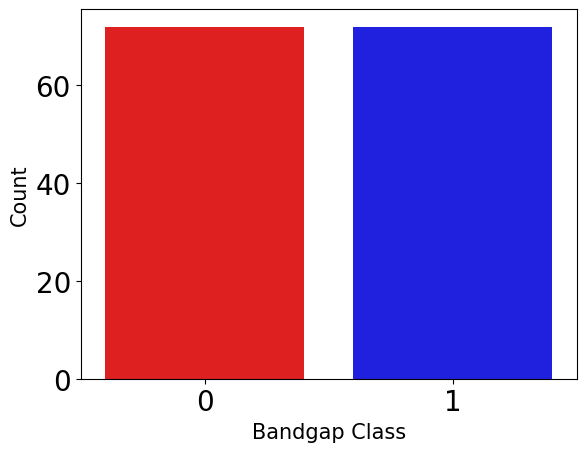

In [27]:
#plt.figure(figsize=(6,4),dpi=300)
palette = ['red', 'blue']
b2= sns.countplot(x ='BandGap_class',data = smote_data, palette=palette)
b2.set_xlabel("Bandgap Class",fontsize=15)
b2.set_ylabel("Count",fontsize=15)
b2.tick_params(labelsize=20)
b2.figure.savefig("BandgapCount_SMOTE.pdf",bbox_inches='tight')
plt.show()
# from google.colab import files
# files.download("BandgapCount_SMOTE.pdf")

In [28]:
smote_data.shape

(144, 14)

## Dataset for Class

In [29]:
Class_data = pd.concat([ML_data['compound'],smote_data['BandGap_class'],smote_data.drop(['BandGap_class'], axis=1)], axis=1)
Class_data.head()

,compound,BandGap_class,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max
0,ZnGeN2,0,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
1,ZnGeN2,1,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
2,ZnGeN2,0,181.56,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
3,AlGaN2,1,178.46,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91
4,AlGaN2,1,178.36,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91


In [30]:
Class_data.shape

(144, 15)

In [31]:
Class_data.keys()

Index(['compound', 'BandGap_class', 'Volume', 'vand_rad_Avg', 'vand_rad_Min',
       'vand_rad_Max', 'cov_rad_Avg', 'cov_rad_Min', 'cov_rad_Max',
       'atom_rad_Avg', 'atom_rad_Min', 'atom_rad_Max', 'density_Avg',
       'density_Min', 'density_Max'],
      dtype='object')

In [33]:
#Class_data.to_csv("Class_data.csv", index=False)